# Python データビジュアライゼーション入門

## Ch.05 さまざまなグラフ・チャートによるビジュアライゼーション

- Sec.12 円グラフ
- Sec.13 ドーナツグラフ

In [2]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline
import plotly.subplots
import seaborn as sns
import squarify
from IPython.display import display
from matplotlib import rcParams

rcParams["font.family"] = "IPAexgothic"

### Sec.12 円グラフ

- [matplotlib.pyplot.pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

list5.54 デフォルト設定の円グラフの描画例

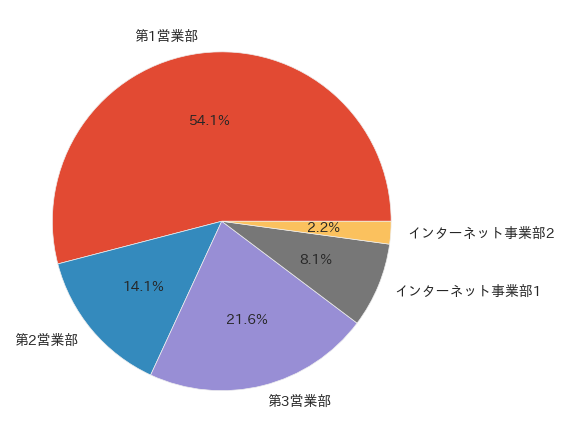

In [9]:
# autopct=%1.1f%%
# 各データの割合を小数点以下１桁までの値として円グラフに表示する

# sns.set(font="meiryo")
plt.style.use("ggplot")

# データの定義
sales_dep = pd.DataFrame(
    {
        "label": ["第1営業部", "第2営業部", "第3営業部", "インターネット事業部1", "インターネット事業部2"],
        "value": [500, 130, 200, 75, 20],
    }
)

# 描画
plt.pie(x=sales_dep["value"], labels=sales_dep["label"], autopct="%1.1f%%")
plt.show()

#### 大きい順に並べて時計の12時のいちから始まる円グラフにする

list5.55 12時の位置から始まる円グラフの描画例

In [10]:
sales_dep

,label,value
0,第1営業部,500
1,第2営業部,130
2,第3営業部,200
3,インターネット事業部1,75
4,インターネット事業部2,20


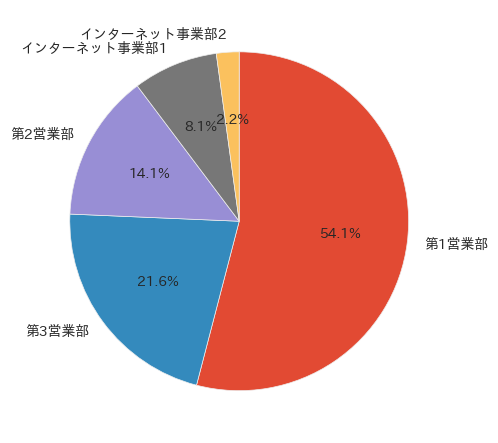

In [11]:
# ascending=False: 降順
# startangle=90: 12時の位置から円グラフの描画が始まる
# counterclock=False: 描画の方向を時計回りにする

sales_dep = sales_dep.sort_values("value", ascending=False)

plt.pie(
    x=sales_dep["value"],
    labels=sales_dep["label"],
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
)
plt.show()

#### 強調したい扇形だけ色を変える

list5.56 強調したい扇形だけ色を変更した描画例

In [12]:
# データの定義
sales_dep = pd.DataFrame(
    {
        "label": ["第1営業部", "第2営業部", "第3営業部", "インターネット事業部1", "インターネット事業部2"],
        "value": [500, 130, 200, 75, 20],
    }
)
sales_dep

,label,value
0,第1営業部,500
1,第2営業部,130
2,第3営業部,200
3,インターネット事業部1,75
4,インターネット事業部2,20


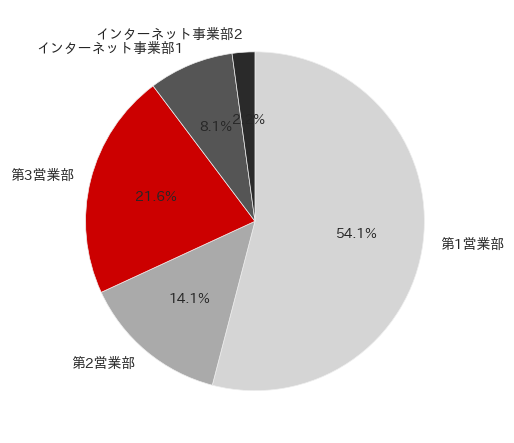

In [13]:
# 強調したい扇形のラベル
point_label = "第3営業部"
# 強調色
pint_color = "#CC0000"
# カラーパレットの設定
palette = sns.color_palette("binary", n_colors=len(sales_dep))

# 特定のラベルに対する色指定を変更する
for i in sales_dep[sales_dep.label == point_label].index.values:
    palette[i] = pint_color

# 描画
plt.pie(
    x=sales_dep["value"],
    labels=sales_dep["label"],
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
    colors=palette,
)
plt.show()

#### plotlyで円グラフを描画する

list5.57 plotlyによる円グラフの描画例

In [14]:
# データの定義
sales_dep = pd.DataFrame(
    {
        "label": ["第1営業部", "第2営業部", "第3営業部", "インターネット事業部1", "インターネット事業部2"],
        "value": [500, 130, 200, 75, 20],
    }
)

# 描画
fig = go.Figure(data=[go.Pie(labels=sales_dep["label"], values=sales_dep["value"])])
fig.show()

### Sec.13 ドーナツグラフ

- [plotly/Pie Charts in Python](https://plotly.com/python/pie-charts/)

list5.58 ドーナツグラフの描画例

In [3]:
# データ
# データの定義
sales_dep = pd.DataFrame(
    {
        "label": ["第1営業部", "第2営業部", "第3営業部", "インターネット事業部1", "インターネット事業部2"],
        "value": [500, 130, 200, 75, 20],
    }
)
sales_dep

,label,value
0,第1営業部,500
1,第2営業部,130
2,第3営業部,200
3,インターネット事業部1,75
4,インターネット事業部2,20


In [5]:
# Pieグラフ（ドーナツチャート）
fig = go.Figure(
    data=[go.Pie(labels=sales_dep["label"], values=sales_dep["value"], hole=0.5)]
)

# グラフタイトルとドーナツ部分の文字列
fig.update_layout(
    title_text="部署別売上",
    annotations=[
        {"text": "売上構成", "x": 0.5, "y": 0.5, "font_size": 20, "showarrow": False}
    ],
)

# 表示
fig.show()